<a href="https://colab.research.google.com/github/sahug/ds-nlp/blob/main/NLP%20-%20Session%209%20-%20SpaCy%20-%20Amazon%20and%20IMDB%20Review%20Sentiment%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NLP - Session 9 - SpaCy - Amazon and IMDB Review Sentiment Classification**

#### What is NLP?
Natural Language Processing (NLP) is the field of Artificial Intelligence concerned with the processing and understanding of human language. Since its inception during the 1950s, machine understanding of language has played a pivotal role in translation, topic modeling, document indexing, information retrieval, and extraction.

#### Some Applications of NLP
 - Text Classification
 - Spam Filters
 - Voice text messaging
 - Sentiment analysis
 - Spell or grammar check
 - Chat bot
 - Search Suggestion
 - Search Autocorrect
 - Automatic Review Analysis system
 - Machine translation

#### spaCy installation
You can run the following commands:-

`
!pip install -U spacy
!pip install -U spacy-lookups-data
!python -m spacy download en_core_web_sm
`

#### Scikit-learn installation
You can run the following command:-

`!pip install scikit-learn`

#### Data Cleaning Options
 - Case Normalization
 - Removing Stop Words
 - Removing Punctuations or Special Symbols
 - Lemmatization or Stemming
 - Parts of Speech Tagging
 - Entity Detection
 - Bag of Words
 - TF-IDF
 
#### Bag of Words – The Simplest Word Embedding Technique
This is one of the simplest methods of embedding words into numerical vectors. It is not often used in practice due to its oversimplification of language, but often the first embedding technique to be taught in the classroom setting. Whenever we apply any algorithm in NLP, it works on numbers. We cannot directly feed our text into that algorithm. Hence, Bag of Words model is used to preprocess the text by converting it into a bag of words, which keeps a count of the total occurrences of unique words.

A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

 - A vocabulary of known words.
 - A measure of the presence of known words.

It is called a “bag” of words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.

`doc1 = "I am high"
doc2 = "Yes I am high"
doc3 = "I am kidding"`

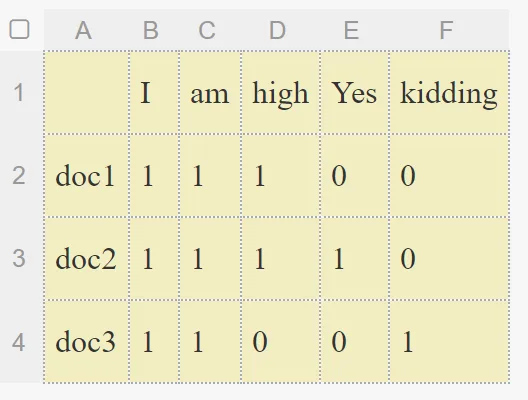

#### Bag of Words and Tf-idf
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html

In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

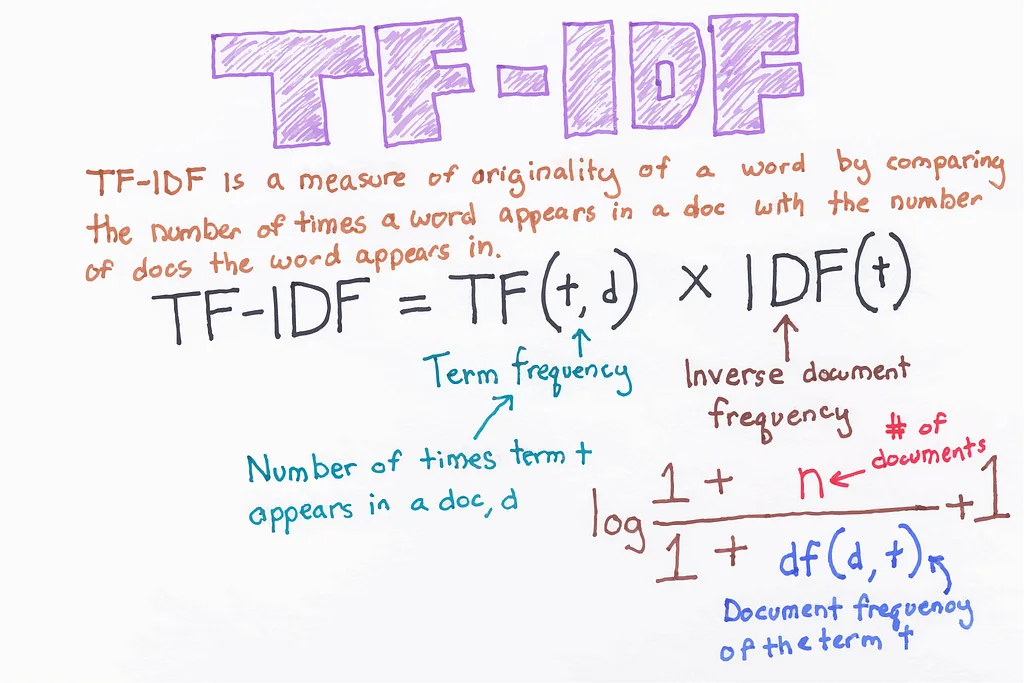

#### Pipeline in SpaCy
When you call nlp on a text, spaCy first tokenizes the text to produce a Doc object. The Doc is then processed in several different steps – this is also referred to as the processing pipeline.

The pipeline used by the default models consists of a tagger, a parser and an entity recognizer. Each pipeline component returns the processed Doc, which is then passed on to the next component.


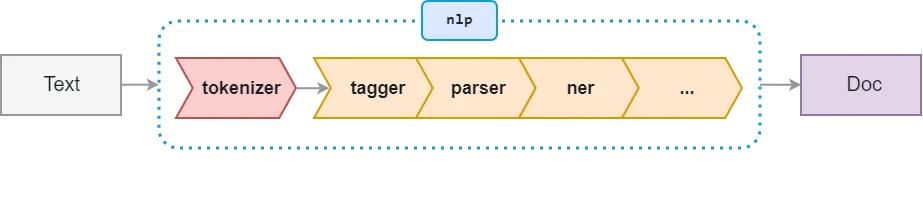


In [ ]:
import spacy
from spacy import displacy

`spacy.load()` loads a model. When you call `nlp` on a text, spaCy first tokenizes the text to produce a `Doc` object. The `Doc` is then processed using the pipeline.

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
text = "Apple, This is first sentence. and Google this is another one. here 3rd one is"
text

In [ ]:
doc = nlp(text)
doc

In [ ]:
for token in doc:
    print(token)

`create_pipe()` creates the pipeline components. `sentencizer` adds rule-based sentence segmentation without the dependency parse. Custom components can be added to the pipeline using the `add_pipe` method. Optionally, you can either specify a component to add it before or after, tell `spaCy` to add it first or last in the pipeline. We will add `sentencizer` before `parser`.

In [ ]:
sent = nlp.create_pipe("sentencizer")

In [ ]:
nlp.add_pipe(sent, before="parser")

In [ ]:
doc = nlp(text)

In [ ]:
for sent in doc.sents:
    print(sent)

#### Stop Words
`stop words` are words which are filtered out before or after processing of natural language data. A They are commonly used word such as “the”, “a”, “an”, “in” which don’t add significant meaning to the sentence. `STOP_WORDS` is a set of default stop words for English language model in SpaCy. We can see the stop words in SpaCy below.

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS

In [ ]:
stopwords = list(STOP_WORDS)

In [ ]:
stopwords

In [ ]:
len(stopwords)

In [ ]:
for token in doc:
    if token.is_stop == False:
        print(token)

#### Lemmatization
In `lemmatization`, the words are replaced by the root words or the words with similar context. For example, given the word went, the lemma would be ‘go’ since went is the past form of go. Below we have printed the tokens and the lemma for each token.

In [ ]:
doc = nlp("run runs running runner")
doc

In [ ]:
for lem in doc:
    print(lem.text, lem.lemma_)

#### POS
Part-of-Speech (PoS) tagging, then it may be defined as the process of assigning one of the parts of speech to the given word. It is generally called POS tagging. In simple words, we can say that POS tagging is a task of labelling each word in a sentence with its appropriate part of speech. In the example below we have printed the token.pos_ for each token.

 - DET means determiner
 - AUX means auxiliary
 - ADJ means adverb
 - ADP means adposition
 - NOUN as the name suggests means common noun
 - PUNCT means punctuation

In [ ]:
doc = nlp("All is well at your end!")

In [ ]:
for token in doc:
    print(token.text, token.pos_)

`displacy` visualizes dependencies and entities in your browser or in a notebook. displaCy is able to detect whether you’re working in a Jupyter notebook, and will return markup that can be rendered in a cell straight away. Below command will show the dependencies.

In [ ]:
displacy.render(doc, style="dep")

#### Entity Detection
Entity detection is a popular technique used in information extraction to identify and segment the entities and classify or categorize them under various predefined classes. It locates and classifies named entities mentioned in unstructured text into pre-defined categories such as person names, organizations, locations, medical codes, time expressions, quantities, monetary values, percentages, etc.

 - GPE means Countries, cities, states.
 - DATE means Absolute or relative dates or periods.
 - CARDINAL means Numerals that do not fall under another type.
 - PERSON means People, including fictional.
 - NORP means Nationalities or religious or political groups.
 - MONEY means Monetary values, including unit.

In [ ]:
doc = nlp(
    "New York City on Tuesday declared a public health emergency and ordered mandatory measles vaccinations amid an outbreak, becoming the latest national flash point over refusals to inoculate against dangerous diseases. At least 285 people have contracted measles in the city since September, mostly in Brooklyn’s Williamsburg neighborhood. The order covers four Zip codes there, Mayor Bill de Blasio (D) said Tuesday. The mandate orders all unvaccinated people in the area, including a concentration of Orthodox Jews, to receive inoculations, including for children as young as 6 months old. Anyone who resists could be fined up to $1,000."
)
doc

In [ ]:
displacy.render(doc, style="ent")

### Text Classification
Here we have imported the necessary libraries.

 - `pandas` is used to load the dataset and perform operations on the dataframe.
 - `TfidfVectorizer` is used to convert the data from text to numbers.
 - `Pipeline` is used for create a pipeline.
 - `train_test_split` is used to split the dataset in training and testing dataset.
 - `accuracy_score, classification_report, confusion_matrix` are used for validation.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [ ]:
data_yelp = pd.read_csv("data/yelp_labelled.txt", "\t", header=None)

In [ ]:
data_yelp.head()

In [ ]:
columns_name = ["Review", "Sentiment"]
data_yelp.columns = columns_name
data_yelp.head()

In [ ]:
data_yelp.shape

In [ ]:
data_amazon = pd.read_csv("data/amazon_cells_labelled.txt", "\t", header=None)
data_amazon.columns = columns_name
data_amazon.head()

In [ ]:
data_amazon.shape

In [ ]:
data_imdb = pd.read_csv("data/imdb_labelled.txt", sep="\t", header=None)
data_imdb.columns = columns_name
data_imdb.head()

In [ ]:
data_imdb.shape

In [ ]:
data = data_yelp.append([data_amazon, data_imdb], ignore_index=True)

In [ ]:
data.shape

In [ ]:
data.head()

In [ ]:
data["Sentiment"].value_counts()

In [ ]:
data.isnull().sum()

## Cleaning – Tokenization and Lemmatization

`string.punctuation` is a pre-initialized string used as string constant. It will give the all sets of punctuation.

In [ ]:
import string

In [ ]:
punctuations = string.punctuation

In [ ]:
punctuations

In the function `text_data_cleaning()` we are first converting the sentence into tokens. Then for each token we are performing `lemmatization`. If the `lemma` is not a `pronoun` we are converting the `lemma` to `lower case`; else we are converting the token to lower case. Finally we are removing all the `stopwords` and `punctuation` marks.

In [ ]:
def text_data_cleaning(sentence):
    doc = nlp(sentence)
    tokens = []

    for token in doc:
        if token.lemma_ != "-PRON-":
            temp = token.lemma_.lower().strip()
        else:
            temp = token.lower_
        tokens.append(temp)

    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords and token not in punctuations:
            cleaned_tokens.append(token)
    return cleaned_tokens

In [ ]:
text_data_cleaning("    Hello how are you. Like this video")

## Vectorization Feature Engineering (TF-IDF)

`TfidfVectorizer()` converts a collection of raw documents to a matrix of TF-IDF features. We have passed `text_data_cleaning()` as the `tokenizer`. `LinearSVC` is a faster implementation of Support Vector Classification for the case of a linear kernel.

In [ ]:
tfidf = TfidfVectorizer(tokenizer=text_data_cleaning)
classifier = LinearSVC()

Here we are dividing the data into training data and test data using train_test_split() from sklearn which we have already imported. We are going to use 80% of the data for training the model and 20% of the data for testing. random_state controls the shuffling applied to the data before applying the split.

We can see that we have got 2198 samples in the traning dataset and 550 samples in the test dataset.

In [ ]:
x = data["Review"]
y = data["Sentiment"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)
x_train.shape, X_test.shape

In [ ]:
x_train

`Pipeline` enables us to apply a pipeline of transforms with a final estimator. It sequentially applies a list of transforms and a final estimator. Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods. The final estimator only needs to implement fit. The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. The parameter passed in `Pipeline` are a list of (name, transform) tuples (implementing fit/transform) that are chained, in the order in which they are chained, with the last object an estimator.

In [ ]:
clf = Pipeline([("tfidf", tfidf), ("clf", classifier)])

In [ ]:
clf.fit(x_train, y_train)

In [ ]:
y_pred = clf.predict(x_test)

`classification_report()` builds a text report showing the main classification metrics.

In [ ]:
print(classification_report(y_test, y_pred))

`confusion_matrix()` computes confusion matrix to evaluate the accuracy of a classification. By definition a confusion matrix C is such that C(i,j) is equal to the number of observations known to be in group i and predicted to be in group j. Thus in binary classification, the count of true negatives is C(0,0), false negatives is C(1,0), true positives is C(1,1) and false positives is C(0,1)

In [ ]:
confusion_matrix(y_test, y_pred)

Now we will predict the label of some random sentences.

In [ ]:
clf.predict(["Wow, this is amazing lesson"])

In [ ]:
clf.predict(["Wow, this sucks"])

In [ ]:
clf.predict(["Worth of watching it. Please like it"])

In [ ]:
clf.predict(["Loved it. Amazing"])

In this blog we saw some features of SpaCy. Then we went ahead and performed sentiment analysis by loading the data, pre-processing it and then training our model. We used tf-idf vectorizer and Linear SVC to train the model. We got an accuracy of 78%.